<font size=6>**name: Yonatan Juarez<br>github: yonatan-juarez-5**<br>
<font size=5>**HW6: Tree based methods**<br>
python3 -m venv venv

In [34]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import math
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
test_data = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values='na')
print(f"Train data:{train_data.shape}")
print(f"Test data:{test_data.shape}")

Train data:(60000, 171)
Test data:(16000, 171)


<font size=5>**(1b) Data Preparation**

<font size=4>**(1bi) Research what types of techniques are used for dealing with missing values.**
- Deleting rows/columns
- Imputation
- Predictive modeling
- multiple imputation
- data augmentation
- matrix factorization

SimpleImputer() from sklearn allows you to input different strategies to populate missing values.

<font size=5>**(1bii) For each of the 170 features, calculate the cv = s/m**

In [3]:
x_train = train_data.iloc[:, 1:]
y_train = train_data['class']

x_test = test_data.iloc[:, 1:]
y_test = test_data['class']

In [4]:
def impute_data(data:pd.DataFrame):
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    return pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [5]:
x_train_imputed = impute_data(x_train)
x_train_imputed

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [6]:
x_test_imputed = impute_data(x_test)
x_test_imputed

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [7]:
cv_dict = {}
for col in x_train_imputed.columns:
    mean = x_train_imputed[col].mean()
    std = x_train_imputed[col].std()
    cv_dict[col] = [std, mean, std/mean]


cv_df = pd.DataFrame(cv_dict, index=['std', 'mean', 'cv']).T
cv_df

,std,mean,cv
aa_000,1.454301e+05,5.933650e+04,2.450938
ab_000,1.660588e+00,7.131885e-01,2.328400
ac_000,7.724678e+08,3.560143e+08,2.169767
ad_000,3.504515e+07,1.906206e+05,183.847620
ae_000,1.581420e+02,6.819130e+00,23.190937
...,...,...,...
ee_007,1.718366e+06,3.462714e+05,4.962483
ee_008,4.469894e+05,1.387300e+05,3.222010
ee_009,4.720424e+04,8.388915e+03,5.626979
ef_000,4.268529e+00,9.057895e-02,47.124953


<font size=5>**(1biii) Plot the correlation matrix for features**

<Axes: >

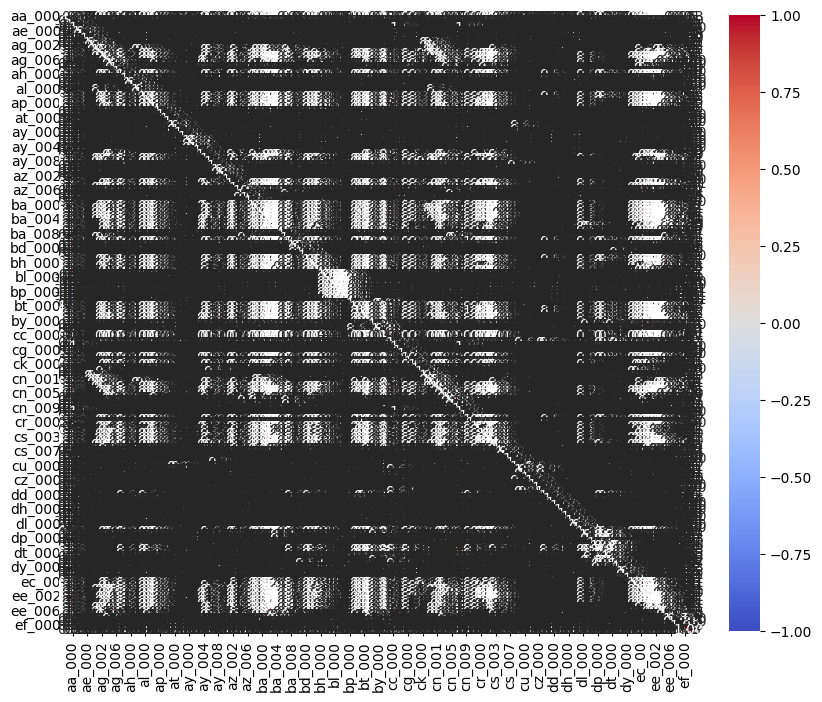

In [8]:
correlation_matrix = x_train_imputed.corr()
# correlation_matrix.style.background_gradient()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

<font size=5>**(1biv) Pick sqrt(170) featurs with the highest cv and make scatter /box pplots for them**

In [9]:
highest_cv_idx = np.argsort(cv_df['cv'])[::-1][:math.floor(np.sqrt(170))]
col = x_train_imputed.columns[highest_cv_idx]
print("Features with highest CV:")
cv_df['cv'][col]    

Features with highest CV:


cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
Name: cv, dtype: float64

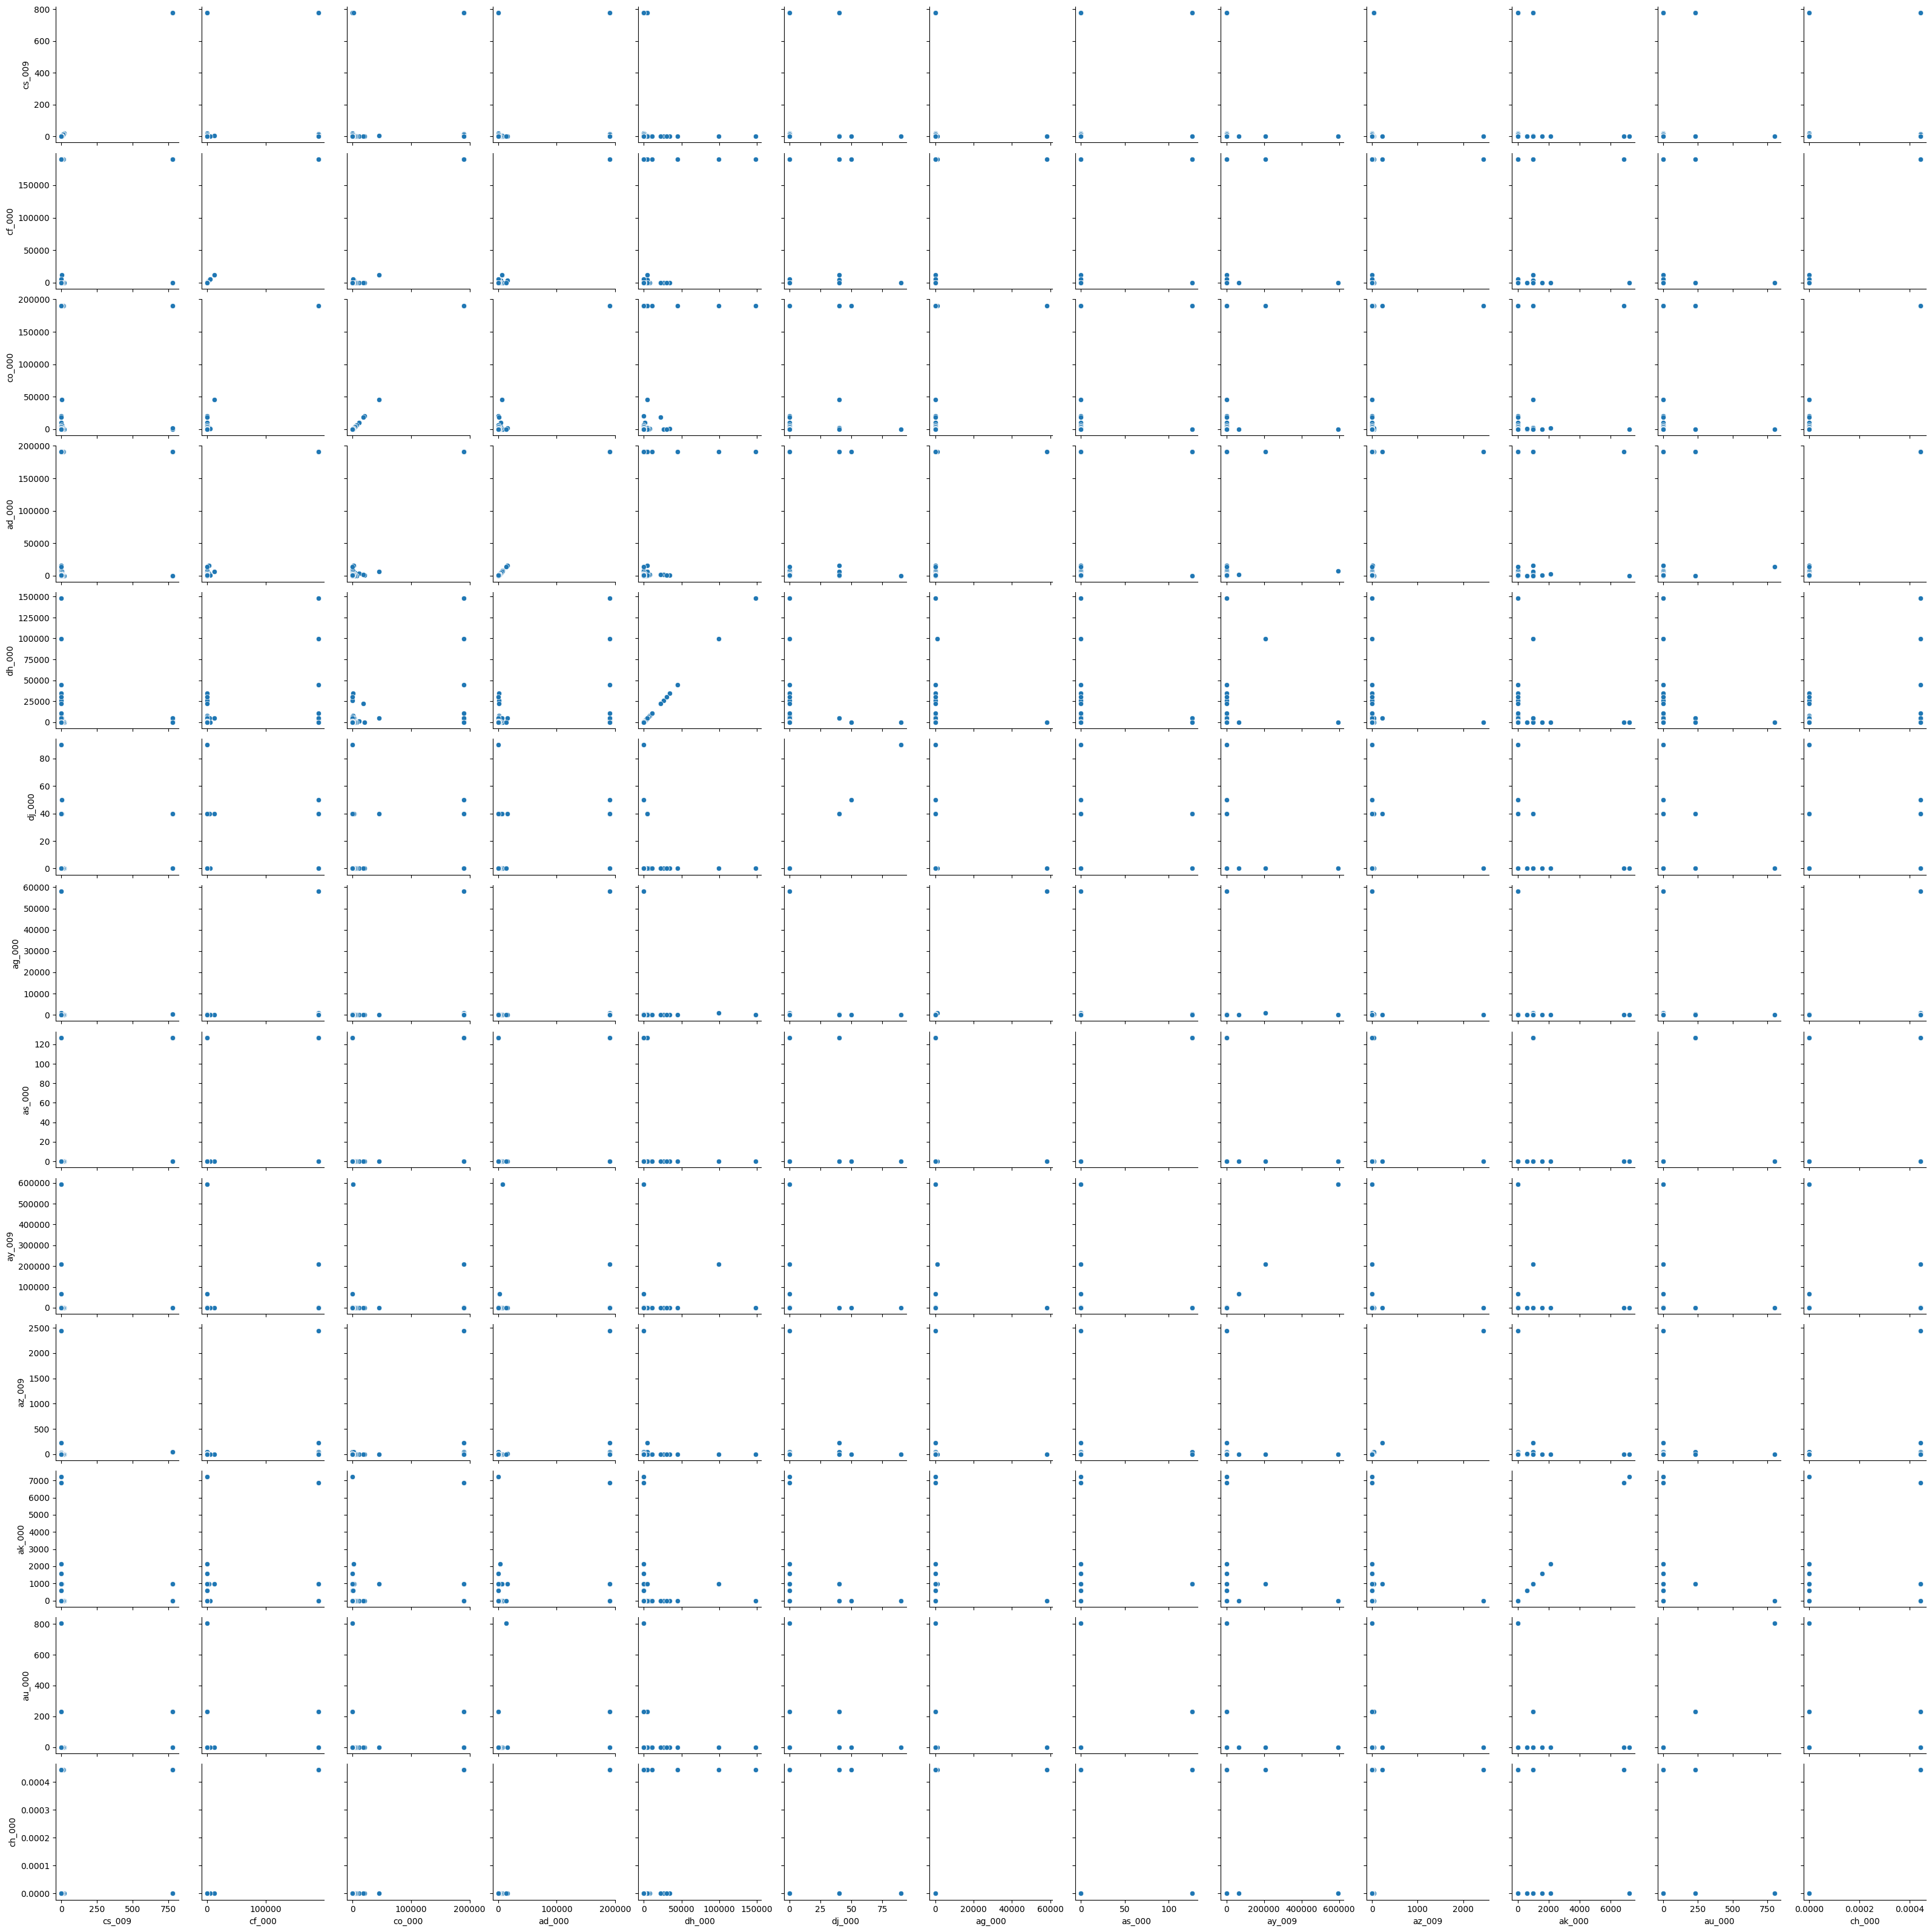

In [10]:
sns.pairplot(data=x_train_imputed[col].sample(1000), diag_kind=None)

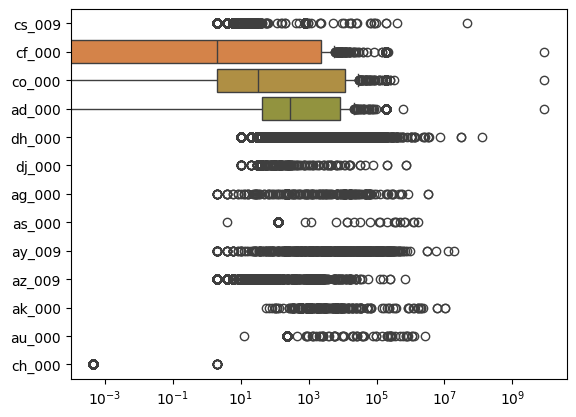

In [11]:
sns.boxplot(data=x_train_imputed[col], orient='h')
plt.xscale('log')
plt.show()


- I cannot make any conclusions from the scatter plots since the imputed data are scattered with no evident correlation<br>
- For the box plots, most of the featues selected are concentrated around log(10^1) - log(10^7), which would make it easy to detect outliers if they existed

<font size=5>**(1bv) Determien the number of positive and negative data. Is data imbalanced?**

In [12]:
print('Train classes:')
print(y_train.value_counts())
print('Test classes:')
print(y_test.value_counts())

Train classes:
class
neg    59000
pos     1000
Name: count, dtype: int64
Test classes:
class
neg    15625
pos      375
Name: count, dtype: int64


<!-- <font size=4> -->
- The data can be considered imbalanced because there are only 1.67% of positive classes in the train data<br>
and 2.34% for the test data.

<font size=5>**(1c) Train a random forest to classify the data set. Do not compensate for class imbalance.<br>
Calculate confusion matrix, roc, auc, and misclassification for train and test data.<br>
Calculate Out of Bag error estimate**

In [13]:
def random_forest(x, y, imbalanced=True):
    if imbalanced:
        model = RandomForestClassifier(max_depth=5, random_state=600000, oob_score=True)
    else:
        model = RandomForestClassifier(max_depth=5, random_state=60000, class_weight='balanced', oob_score=True)

    model.fit(x, y)
    return model

def print_model_summary(label, y, pred, prob):
    print(label)
    cm = confusion_matrix(y, pred)
    print(f"Confusion matrix: {cm}")

    accuracy = np.round(accuracy_score(y, pred), 6)
    print(f"Accuracy: {accuracy}")
    print(f"Error: {1-accuracy:.6f}")

    data = {'cm': cm, 'accuracy': accuracy, 'error': np.round(1-accuracy, 6)}
    return data

def plot_roc(label, y, prob, xgboost:bool):
    fig, axes = plt.subplots(figsize=(6,4))
    axes.set_title(f"ROC curve: {label}")
    pred = prob[:,1]
    if not xgboost:
        fpr, tpr, thresholds = roc_curve(y, pred, pos_label='pos')
    else:
        fpr, tpr, thresholds = roc_curve(y, pred, )

    roc_auc = auc(fpr, tpr)
    axes.plot (fpr, tpr, label=f"ROC Curve: {np.round(roc_auc, 6)}")
    axes.plot([0,1], [0,1], '--')
    axes.set_xlabel("FPR")
    axes.set_ylabel("TPR")
    axes.legend()
    plt.show()

Train
Confusion matrix: [[58974    26]
 [  433   567]]
Accuracy: 0.99235
Error: 0.007650


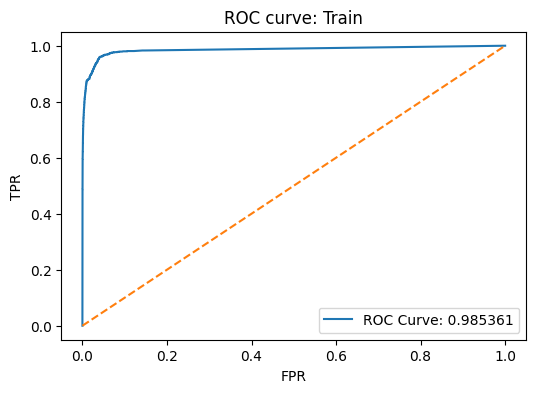

In [14]:
imbalanced_rf_model = random_forest(x_train_imputed, y_train)
y_train_pred = imbalanced_rf_model.predict(x_train_imputed)
y_train_prob = imbalanced_rf_model.predict_proba(x_train_imputed)
data = print_model_summary('Train', y_train, y_train_pred, y_train_prob)
plot_roc('Train', y_train, y_train_prob, False)


Test
Confusion matrix: [[15612    13]
 [  180   195]]
Accuracy: 0.987938
Error: 0.012062


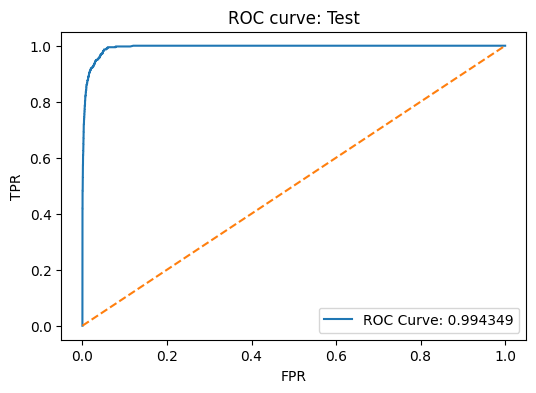

In [15]:
y_test_pred = imbalanced_rf_model.predict(x_test_imputed)
y_test_prob = imbalanced_rf_model.predict_proba(x_test_imputed)
y_data = print_model_summary('Test', y_test, y_test_pred, y_test_prob)
plot_roc('Test', y_test, y_test_prob, False)

In [16]:
# Out of Bag error
train_oob_error = np.round(1-imbalanced_rf_model.oob_score_, 6)
test_error = np.round(1-accuracy_score(y_test, y_test_pred), 6)
print(f"Out of Bag error: {train_oob_error}")
print(f"Test error: {test_error}")

Out of Bag error: 0.00905
Test error: 0.012062


<font size=5>**(1d) Research how class imbalance is addressed in random forests. Compensate for class imabalance<br>
in your random forest and repeat 1c.**

- Adjust class_weight to balanced
- Manual weighting
- Resampling techniques
- Ensemble of balanced trees
- Cost-sensitive learning

Balanced Train
Confusion matrix: [[56563  2437]
 [   31   969]]
Accuracy: 0.958867
Error: 0.041133


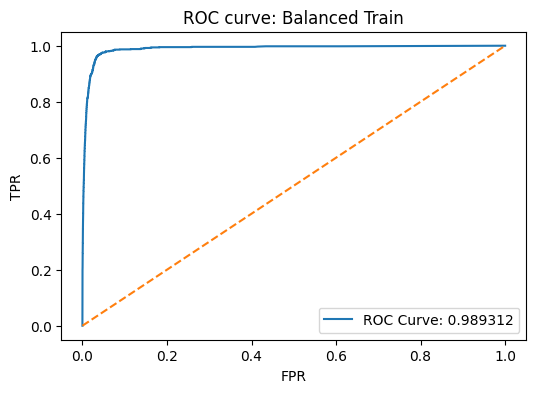

In [17]:
balanced_rf_model = random_forest(x_train_imputed, y_train, False)
y_train_pred = balanced_rf_model.predict(x_train_imputed)
y_train_prob = balanced_rf_model.predict_proba(x_train_imputed)
data = print_model_summary('Balanced Train', y_train, y_train_pred, y_train_prob)
plot_roc('Balanced Train', y_train, y_train_prob, False)


Balanced Test
Confusion matrix: [[14992   633]
 [   15   360]]
Accuracy: 0.9595
Error: 0.040500


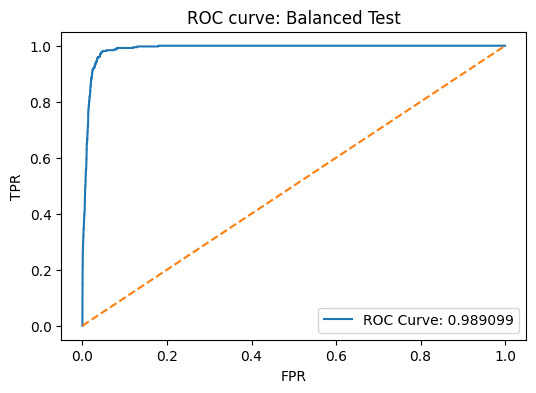

In [18]:
y_test_pred = balanced_rf_model.predict(x_test_imputed)
y_test_prob = balanced_rf_model.predict_proba(x_test_imputed)
y_data = print_model_summary('Balanced Test', y_test, y_test_pred, y_test_prob)
plot_roc('Balanced Test', y_test, y_test_prob, False)

In [19]:
# Balanced Out of Bag error
train_oob_error = np.round(1-balanced_rf_model.oob_score_, 6)
test_error = np.round(1-accuracy_score(y_test, y_test_pred), 6)
print(f"Balanced Out of Bag error: {train_oob_error}")
print(f"Balanced Test error: {test_error}")

Balanced Out of Bag error: 0.04245
Balanced Test error: 0.0405


<font size=5> Observations:
- Comparing the imbalanced vs balanced results, the misclassifcation for the imbalanced data set is alot higher,
due to the low percentage of positive data. It performs well on the negative class, since there is a large percentage of them.
- When the data is balanced, the model performs way on the positive class, and classification rates for positive and negative are proportional. 

<font size=5>**(1e) XGBoost and Model Trees<br>
In the case of a univariate tree, only one input is dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can be used.**

In [20]:
def getXGBClassifier(train_x, train_y, param_grid, cv_type='5-fold'):
    model = XGBClassifier(objective='binary:logistic', colsample_bytree=0.3,
                          learning_rate=0.1, max_depth=5, use_label_encoder=False)

    if cv_type == '5-fold':
        cv = KFold(n_splits=5, shuffle=True, random_state=69)
    elif cv_type == '10-fold':
        cv = KFold(n_splits=10, shuffle=True, random_state=69)
    elif cv_type == 'loocv':
        cv = LeaveOneOut()
    else:
        raise ValueError("Invalid value for cv_type. Supported values: '5-fold', '10-fold', 'loocv'.")

    gridcv_cross_val = GridSearchCV(model, param_grid, n_jobs=-1, cv=cv, scoring="accuracy")

    gridcv_cross_val.fit(train_x, train_y)
    best_alpha = gridcv_cross_val.best_params_['reg_alpha']
    print('Best Alpha:', best_alpha)
    print('Best CV training accuracy:', round(gridcv_cross_val.best_score_, 5))
    return [gridcv_cross_val, best_alpha]

def test_classifier(x_train, y_train, x_test, y_test, best_alpha):
    model = XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha, colsample_bytree = 0.3, 
                          learning_rate = 0.1, max_depth = 5, use_label_encoder = False)
    model.fit(x_train, y_train)
    
    train_y_predicted = model.predict(x_train)
    train_y_prob = model.predict_proba(x_train)

    test_y_predicted = model.predict(x_test)
    test_y_prob = model.predict_proba(x_test)

    stats = {}
    stats['train'] = model_summary('Training', y_train, train_y_predicted, train_y_prob)
    stats['test'] = model_summary('Test', y_test, test_y_predicted, test_y_prob)
    plot_roc('Train', y_train, train_y_prob, True)    
    plot_roc('Test', y_test, test_y_prob, True)    
    return stats

def model_summary(label, y, pred, prob):
    print(label)
    cm = confusion_matrix(y, pred)
    print(f"Confusion matrix: {cm}")

    accuracy = np.round(accuracy_score(y, pred), 6)
    print(f"Accuracy: {accuracy}")
    print(f"Error: {1-accuracy:.6f}")

    roc = round(roc_auc_score(y, pred), 5)
    print(f"ROC: {roc}")
    data = {'cm': cm, 'accuracy': accuracy, 'error': np.round(1-accuracy, 6)}
    data['roc'] = roc
    return data

In [21]:
param_grid = {'reg_alpha': [0, 0.01, 0.1, 0.5, 1.0]}
std = StandardScaler()
x_train = pd.DataFrame(std.fit_transform(x_train_imputed), columns=x_train_imputed.columns)
y_train = y_train.replace({'neg':0, 'pos':1})
x_test = pd.DataFrame(std.fit_transform(x_test_imputed), columns=x_test_imputed.columns)
y_test = y_test.replace({'neg':0, 'pos':1})

5-fold:
Best Alpha: 0.01
Best CV training accuracy: 0.99432
Training
Confusion matrix: [[58994     6]
 [  102   898]]
Accuracy: 0.9982
Error: 0.001800
ROC: 0.94895
Test
Confusion matrix: [[15601    24]
 [   98   277]]
Accuracy: 0.992375
Error: 0.007625
ROC: 0.86857


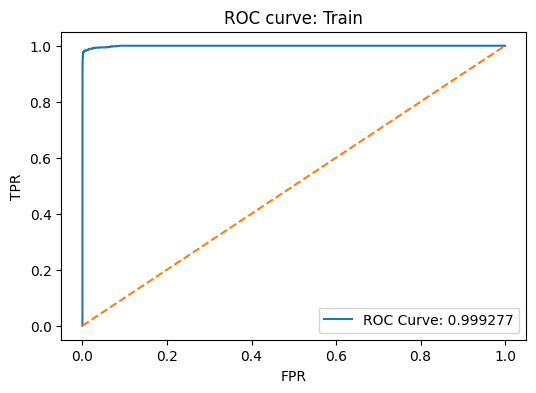

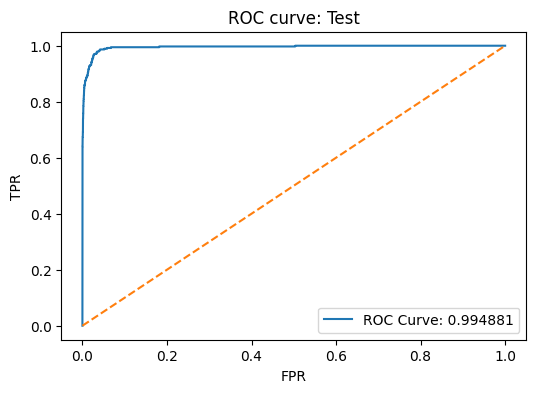

In [22]:
print("5-fold:")
results_5_fold = getXGBClassifier(x_train, y_train, param_grid, cv_type='5-fold')
test_5_fold = test_classifier(x_train, y_train, x_test, y_test, results_5_fold[1])

10-fold:
Best Alpha: 0.01
Best CV training accuracy: 0.99448
Training
Confusion matrix: [[58994     6]
 [  102   898]]
Accuracy: 0.9982
Error: 0.001800
ROC: 0.94895
Test
Confusion matrix: [[15601    24]
 [   98   277]]
Accuracy: 0.992375
Error: 0.007625
ROC: 0.86857


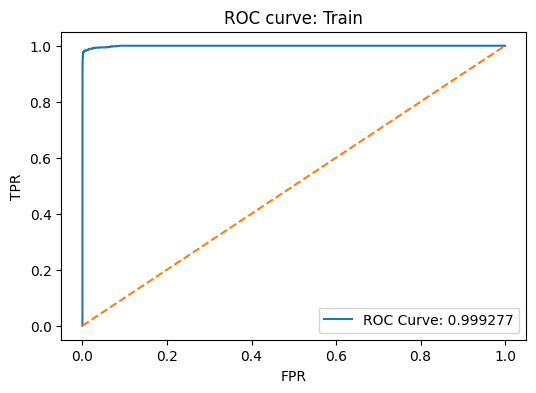

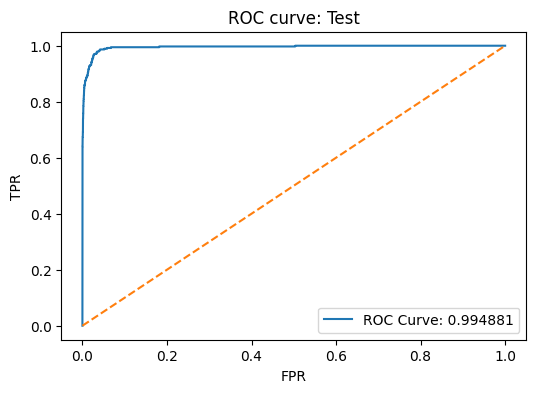

In [23]:
print("10-fold:")
results_10_fold = getXGBClassifier(x_train, y_train, param_grid, cv_type='10-fold')
test_10_fold = test_classifier(x_train, y_train, x_test, y_test, results_10_fold[1])

In [24]:
# print("LOOCV:")
# results_5_fold = getXGBClassifier(x_train, y_train, param_grid, cv_type='loocv')
# test_5_fold = test_classifier(x_train, y_train, x_test, y_test, results_5_fold[1])

<font size=5>**(1f) Use SMOTE to pre-process your data to compensate for class imbalance<br>
Train XGBoost with L1-penalized for logistic regression at each node using the pre-processed data and repeat 1e.<br>**

In [25]:
print(f"Before SMOTE: {y_train.value_counts()}")
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
print(f"After SMOTE: {y_smote.value_counts()}")

Before SMOTE: class
0    59000
1     1000
Name: count, dtype: int64
After SMOTE: class
0    59000
1    59000
Name: count, dtype: int64


Best Alpha: 0
Best CV training accuracy: 0.99418
Training
Confusion matrix: [[58645   355]
 [   68 58932]]
Accuracy: 0.996415
Error: 0.003585
ROC: 0.99642
Test
Confusion matrix: [[13188  2437]
 [    6   369]]
Accuracy: 0.847312
Error: 0.152688
ROC: 0.91402


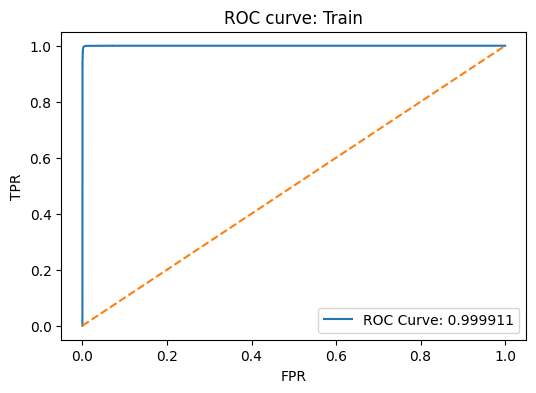

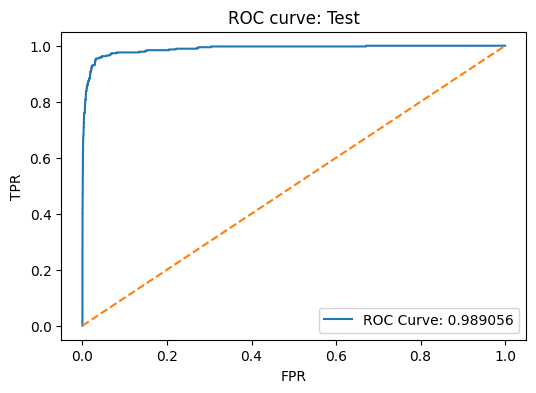

In [26]:
results = getXGBClassifier(x_smote, y_smote,param_grid, '5-fold')
test_results = test_classifier(x_smote, y_smote, x_test, y_test, results[1])

In [27]:
results = {'Train Accuracy': test_5_fold['train']['accuracy'], 'Train Error': test_5_fold['train']['error'], 'Train ROC':test_5_fold['train']['roc'],
    'Test Accuracy': test_5_fold['test']['accuracy'], 'Test Error': test_5_fold['test']['error'], 'Test ROC':test_5_fold['test']['roc']}
results_smote={
'Train Accuracy': test_results['train']['accuracy'], 'Train Error': test_results['train']['error'], 'Train ROC':test_results['train']['roc'],
    'Test Accuracy': test_results['test']['accuracy'], 'Test Error': test_results['test']['error'], 'Test ROC':test_results['test']['roc'],
}
results_df = pd.DataFrame([results, results_smote], index=['Without SMOTE', 'With SMOTE']).T

results_df

,Without SMOTE,With SMOTE
Train Accuracy,0.998200,0.996415
Train Error,0.001800,0.003585
Train ROC,0.948950,0.996420
Test Accuracy,0.992375,0.847312
Test Error,0.007625,0.152688
Test ROC,0.868570,0.914020


- Using SMOTE to compensate for the class imbalance, the model is balanced and able to to better predict neg and pos.
This is evident in the increase in the train and test errors.
- Misclassication for the training set decreases from 102 to 69.

<font size=5>**(6) ISLR 9.7.3**

In [31]:
data = {'x1':[3,2,4,1,2,4,4], 'x2':[4,2,4,4,1,3,1], 'y':[0, 0,0,0, 1,1,1]}
# red = 0, blue = 1
data_df = pd.DataFrame(data)
data_df

,x1,x2,y
0,3,4,0
1,2,2,0
2,4,4,0
3,1,4,0
4,2,1,1
5,4,3,1
6,4,1,1


In [35]:

x_train = data_df.iloc[:, :-1]
y_train = data_df['y']

model = svm.SVC(kernel='linear', C=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

/Users/yonatanjuarez/test/HW6/homework-6-yonatan-juarez-5/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/var/folders/nw/khlzs0ld1276nyvg175gl40r0000gn/T/ipykernel_21066/2668603055.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  ax[1].contour(x_axis, y_axis, z_axis, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,


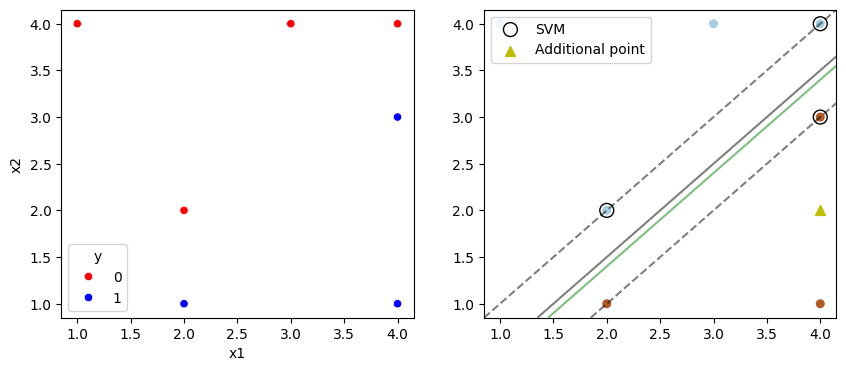

[-1.0004096] [[ 1.9998464 -1.9996928]]


In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.scatterplot(data= data_df, x= 'x1', y='x2', hue='y', palette=['red', 'blue'], ax=ax[0])
ax[1].scatter(data_df.iloc[:,0], data_df.iloc[:,1], c=data_df.iloc[:,-1], s=30, cmap=plt.cm.Paired)

xlim, ylim = ax[1].get_xlim(), ax[1].get_ylim()
y_axis, x_axis = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(xlim[0], xlim[1], 30))
xy_axis = np.vstack([x_axis.ravel(), y_axis.ravel()]).T
z_axis = model.decision_function(xy_axis).reshape(x_axis.shape)


ax[1].contour(x_axis, y_axis, z_axis, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles=['--', '-', '--'], label = "Decision Boundary")
ax[1].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100,
           linewidth = 1, facecolors = 'none', edgecolors='k', label = "SVM")
ax[1].contour(x_axis, y_axis, z_axis - 0.2, colors = 'g', levels = [0], alpha = 0.5,
           linestyles=['-'])
ax[1].scatter([4.0], [2.0], color = 'y', marker = '^', s = 50, label = "Additional point")
ax[1].legend(loc='upper left')

plt.show()
print(model.intercept_, model.coef_)

a) Observation above<br>
b) Hyperplane is the line adjacent to the light green line in the second plot<br>
c) b0 = 1, b1= -1, b2= 2, b0+b1x1+ b2x2 >= 0 class red, else blue<br>
d) dashed lines show the max margin <br>
e) Support vectors show as the black bordered circles<br>
f) If the 7th points closer to the max margin hyperplane it will have an effect<br>
g) non-optimal hyperplane is indicated by the green line<br>
h) The triangle point is a new point which causes classes to no longer be linearly separable
